In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [17]:
train = pd.read_csv('./data/pp_train_v03.csv', encoding='utf-8')
test = pd.read_csv('./data/pp_test_v03.csv', encoding='utf-8')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_number       204000 non-null  int64  
 1   date_time             204000 non-null  object 
 2   temperature           204000 non-null  float64
 3   windspeed             204000 non-null  float64
 4   humidity              204000 non-null  float64
 5   power_consumption     204000 non-null  float64
 6   building_type         204000 non-null  object 
 7   total_area            204000 non-null  float64
 8   cooling_area          204000 non-null  float64
 9   solar_power_capacity  204000 non-null  float64
 10  ess_capacity          204000 non-null  float64
 11  pcs_capacity          204000 non-null  float64
 12  hour                  204000 non-null  int64  
 13  day                   204000 non-null  int64  
 14  month                 204000 non-null  int64  
 15  

In [18]:
# # feature selection 기준 하위 12개 feature

# train = train.drop(['humidity','temperature_1','temperature_2','humidity_1','humidity_2',
#                 'humidity_3','windspeed_1','windspeed_2','windspeed_3','discomfort_1',
#                 'discomfort_2','ess_no'], axis=1)
# test = test.drop(['humidity','temperature_1','temperature_2','humidity_1','humidity_2',
#                 'humidity_3','windspeed_1','windspeed_2','windspeed_3','discomfort_1',
#                 'discomfort_2','ess_no'], axis=1)
# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_number       204000 non-null  int64  
 1   date_time             204000 non-null  object 
 2   temperature           204000 non-null  float64
 3   windspeed             204000 non-null  float64
 4   power_consumption     204000 non-null  float64
 5   building_type         204000 non-null  object 
 6   total_area            204000 non-null  float64
 7   cooling_area          204000 non-null  float64
 8   solar_power_capacity  204000 non-null  float64
 9   ess_capacity          204000 non-null  float64
 10  pcs_capacity          204000 non-null  float64
 11  hour                  204000 non-null  int64  
 12  day                   204000 non-null  int64  
 13  month                 204000 non-null  int64  
 14  weekday               204000 non-null  int64  
 15  

In [53]:
train.describe()

building_number    temperature      windspeed       humidity  \
count    204000.000000  204000.000000  204000.000000  204000.000000   
mean         50.500000      25.543524       2.134052      78.716518   
std          28.866141       3.779523       1.358146      15.080496   
min           1.000000      10.100000       0.000000      13.000000   
25%          25.750000      23.400000       1.200000      69.000000   
50%          50.500000      25.700000       2.000000      81.000000   
75%          75.250000      28.100000       2.800000      91.000000   
max         100.000000      37.100000      13.300000     100.000000   

       power_consumption    total_area  cooling_area  solar_power_capacity  \
count      204000.000000  2.040000e+05  2.040000e+05         204000.000000   
mean         2451.036462  2.608875e+05  1.864032e+05             35.678400   
std          2440.648858  1.273550e+06  1.085174e+06             89.696667   
min             0.000000  5.578400e+03  0.000000e+00              0.000000   
25%          1085.760000  6.144612e+04  2.318700e+04              0.000000   
50%          1766.400000  9.264050e+04  5.582336e+04              0.000000   
75%          2970.000000  1.848135e+05  9.915097e+04             31.250000   
max         25488.400000  1.287288e+07  1.094194e+07            621.000000   

        ess_capacity   pcs_capacity  ...     humidity_3   discomfort_1  \
count  204000.000000  204000.000000  ...  204000.000000  204000.000000   
mean       86.561000      31.000000  ...      -0.000900       0.003938   
std       431.217345     146.079104  ...       9.182435       0.947214   
min         0.000000       0.000000  ...     -46.000000      -9.121670   
25%         0.000000       0.000000  ...      -4.000000      -0.537030   
50%         0.000000       0.000000  ...       0.000000      -0.086910   
75%         0.000000       0.000000  ...       5.000000       0.481120   
max      3100.000000    1000.000000  ...      54.000000       6.607970   

        discomfort_2   discomfort_3       ma_dis_3       ma_dis_5  \
count  204000.000000  204000.000000  204000.000000  204000.000000   
mean        0.008480       0.013515      75.415600      75.410946   
std         1.614823       2.227984       5.422127       5.366819   
min        -9.879240     -10.146810      51.276703      51.735894   
25%        -0.967580      -1.385295      72.572380      72.620498   
50%        -0.179010      -0.290440      76.291660      76.306130   
75%         0.859120       1.260000      79.339183      79.304482   
max        10.676090      13.100210      87.330393      87.210598   

                 CDH  temperature_mean  discomfort_mean       CDH_mean  
count  204000.000000     204000.000000    204000.000000  204000.000000  
mean       -5.418965         25.543524        75.419692      -5.418965  
std        39.345829          1.305998         1.827660      15.630382  
min      -168.400000         21.520833        69.574452     -55.868056  
25%       -27.400000         24.647222        74.170040     -16.604167  
50%        -1.200000         25.463889        75.071408      -6.952778  
75%        22.200000         26.373611        76.653846       3.304167  
max       100.300000         30.414583        81.662243      50.989583  

[8 rows x 33 columns]

In [54]:
train['building_type'].value_counts()

Other Buildings                30600
Public                         16320
University                     16320
Department Store and Outlet    16320
Hospital                       16320
Commercial                     16320
Apartment                      16320
Research Institute             16320
Knowledge Industry Center      16320
Discount Mart                  16320
Hotel and Resort               16320
Data Center                    10200
Name: building_type, dtype: int64

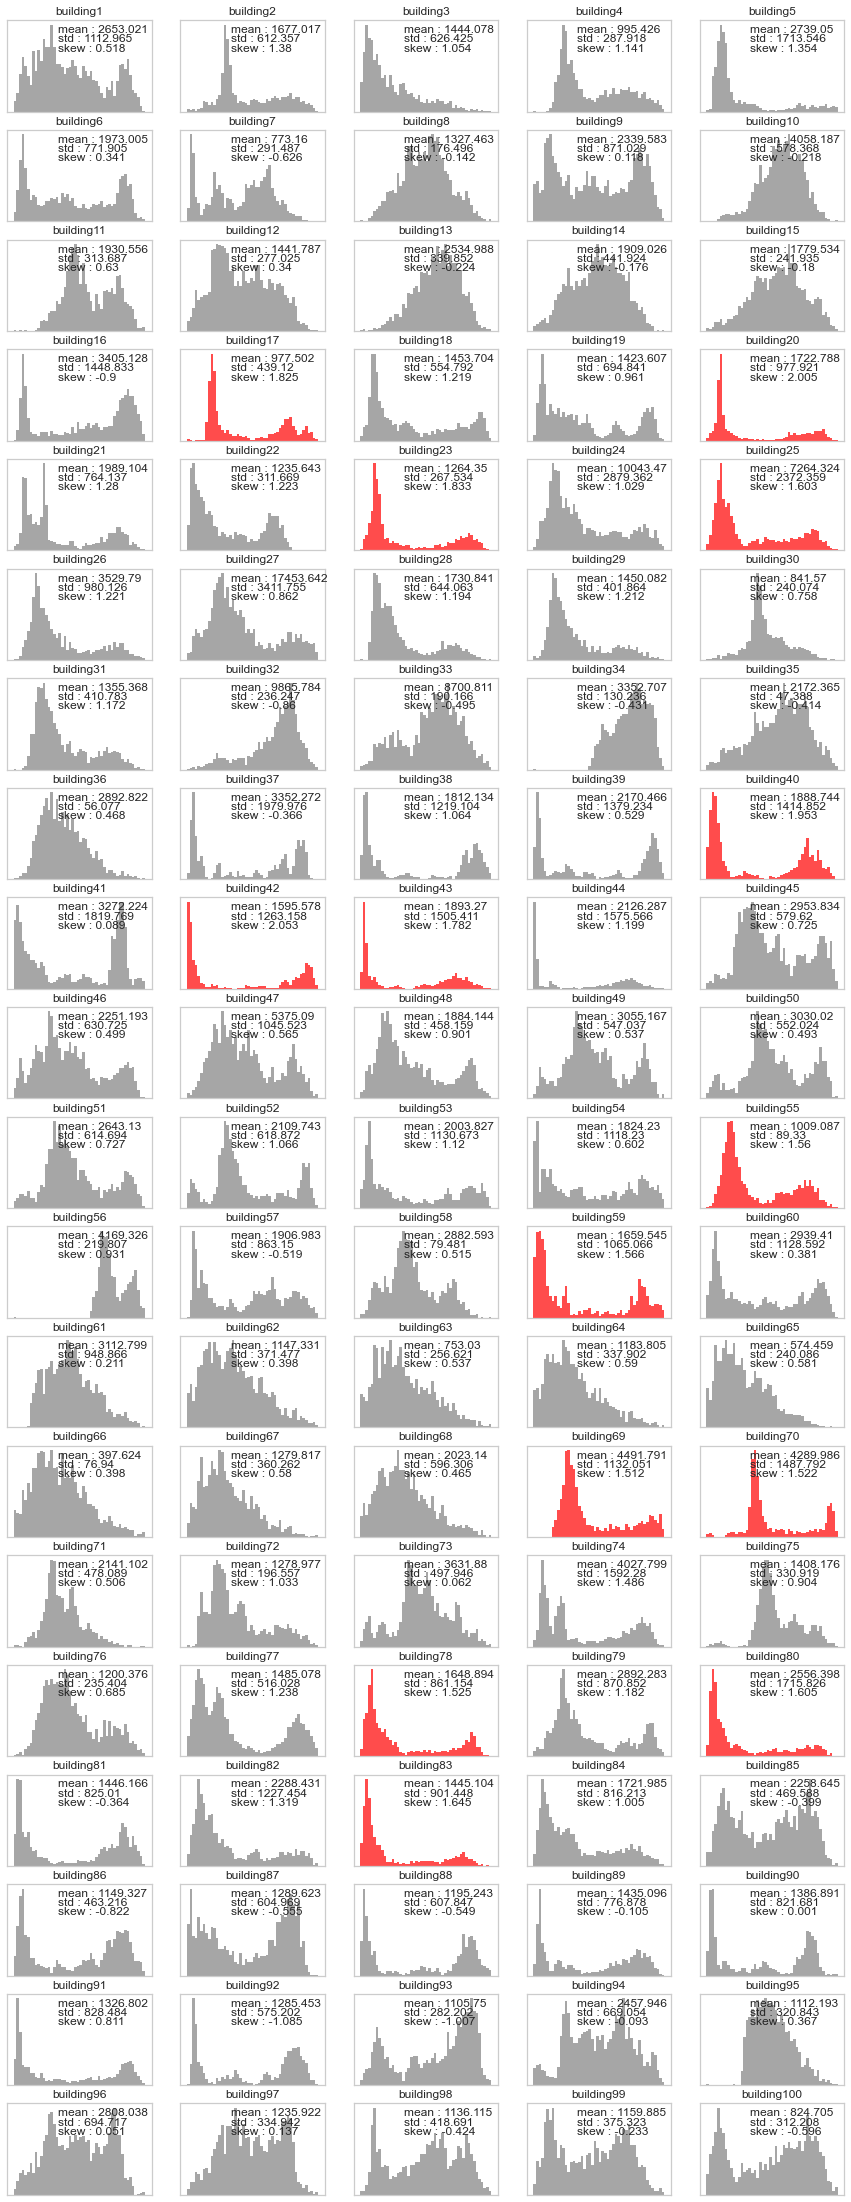

In [21]:
fig = plt.figure(figsize = (15, 40))
for num in range(1,101):
    ax = plt.subplot(20, 5, num)
    energy = train.loc[train['building_number'] == num, 'power_consumption'].values
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

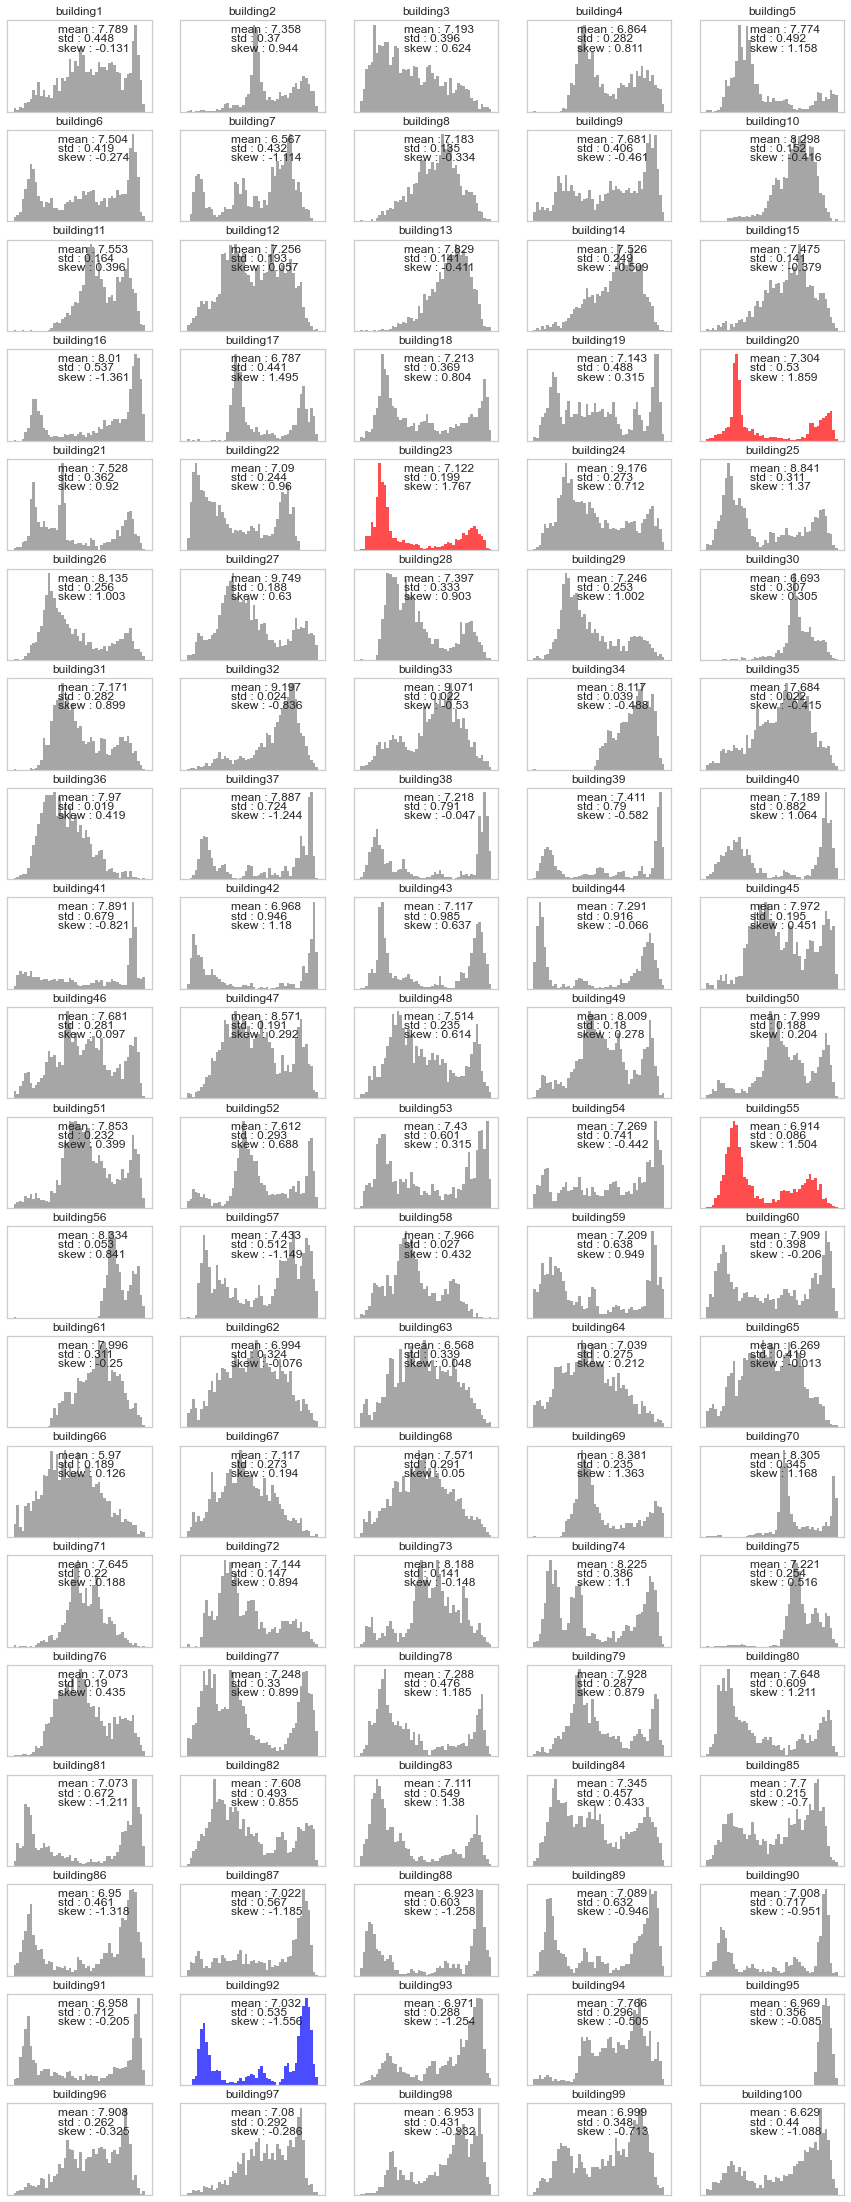

In [22]:
fig = plt.figure(figsize = (15, 40))
for num in range(1,101):
    ax = plt.subplot(20, 5, num)
    energy = np.log(1+train.loc[train['building_number'] == num, 'power_consumption'].values)
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

# 모델링 시에 target을 로그변환한 값으로 학습을 하고, 추론 시에는 모델 예측값에 exponential을 적용

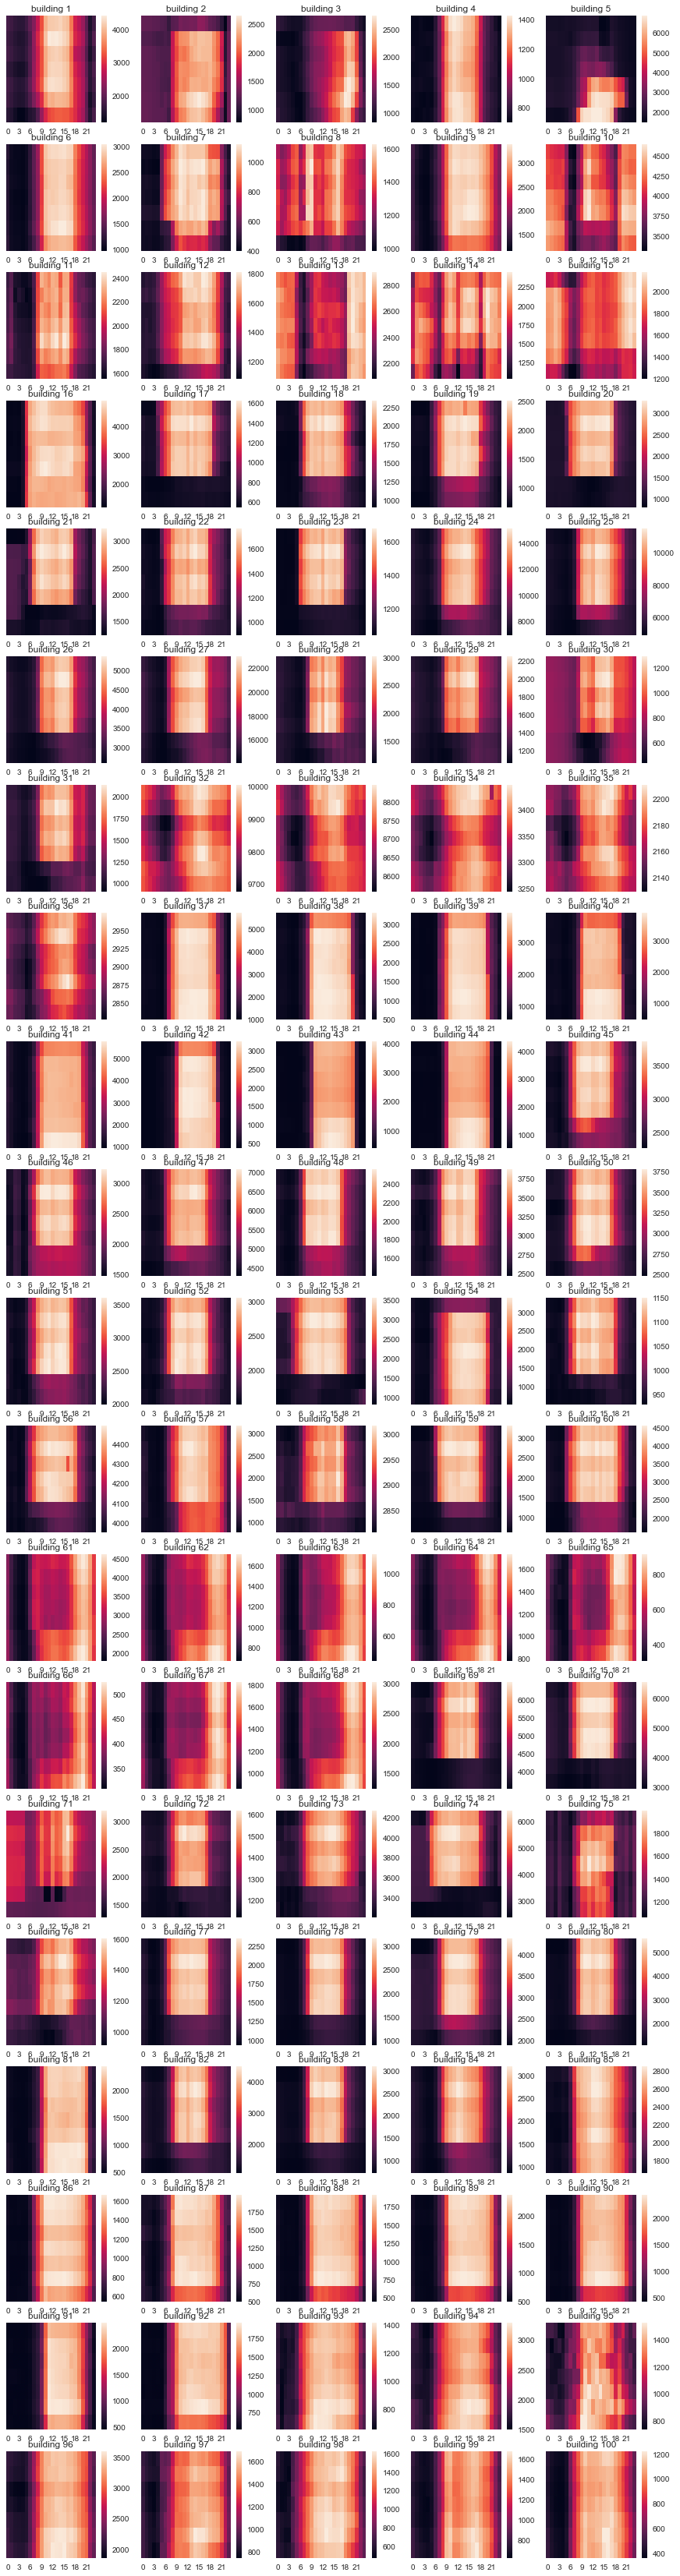

In [24]:
fig = plt.figure(figsize = (15, 60))
for num in train['building_number'].unique():
    df = train[train['building_number'] == num]
    df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index().pivot('weekday', 'hour', 'power_consumption')
    plt.subplot(20, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

1. 건물별 주요 패턴
- 평일 주말 상관없이 낮에만 전력사용량이 높은 건물
- 평일 낮에만 전력사용량이 높은 건물
- 주중 새벽시간에만 전력사용량이 낮은 건물

2. 특이점
- 건물 5의 경우 주말 낮에만 전력사용량이 높음
- 건물 10, 13은 오전 6시에만 전력사용량 거의 없음
- 건물 56의 경우 목요일 오후 4시에 전력사용량이 급히 낮아짐
- 건물 71은 화요일 10 11 13 14시에 특히 전력사용량 낮음

<AxesSubplot:xlabel='date_time', ylabel='power_consumption'>

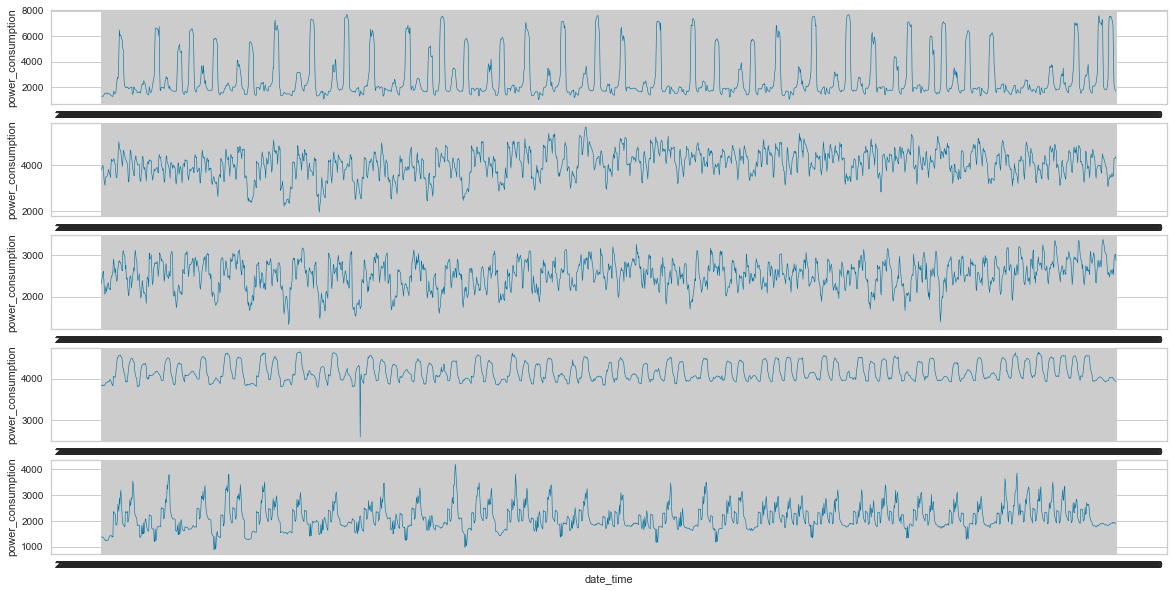

In [57]:
num_5 = train[train.building_number==5]
num_10 = train[train.building_number==10]
num_13 = train[train.building_number==13]
num_56 = train[train.building_number==56]
num_71 = train[train.building_number==71]

fig = plt.figure(figsize = (20, 10))
plt.subplot(511)
sns.lineplot(data = num_5, x = 'date_time', y = 'power_consumption', linewidth = 0.6)
plt.subplot(512)
sns.lineplot(data = num_10, x = 'date_time', y = 'power_consumption', linewidth = 0.6)
plt.subplot(513)
sns.lineplot(data = num_13, x = 'date_time', y = 'power_consumption', linewidth = 0.6)
plt.subplot(514)
sns.lineplot(data = num_56, x = 'date_time', y = 'power_consumption', linewidth = 0.6)
plt.subplot(515)
sns.lineplot(data = num_71, x = 'date_time', y = 'power_consumption', linewidth = 0.6)

In [58]:
print(num_56.loc[num_56.power_consumption<3000, 'date_time'])

112720    2022-06-08 16:00:00
Name: date_time, dtype: object


건물 56에서 발생한 outlier 데이터는 6월 8일 16시 하나로, 주변값의 평균으로 이상치 대체하기로 결정

In [19]:
print(train.iloc[112717,5])
print(train.iloc[112718,5])
print(train.iloc[112719,5])
print(train.iloc[112721,5])
print(train.iloc[112722,5])
print(train.iloc[112723,5])

4324.32
4296.6
4232.16
3997.08
4113.0
3996.0


In [20]:
a = (train.iloc[112717,5]+train.iloc[112718,5] + train.iloc[112719,5] + 
train.iloc[112721,5] + train.iloc[112722,5]+train.iloc[112723,5])/6
train.iloc[112720,5] = a
type(train.iloc[112720,5]), train.iloc[112720,5]

(numpy.float64, 4159.86)

# Clustering building based on median energy usage of each hour and weekday

요일, 시간대에 따른 전력 사용량의 경향성 파악

In [21]:
by_weekday = train.groupby(['building_number','weekday'])['power_consumption'].median().reset_index().pivot('building_number','weekday','power_consumption').reset_index()
by_hour = train.groupby(['building_number','hour'])['power_consumption'].median().reset_index().pivot('building_number','hour','power_consumption').reset_index().drop('building_number', axis = 1)
df = pd.concat([by_weekday, by_hour], axis= 1)
columns = ['building_number'] + ['day'+str(i) for i in range(7)] + ['hour'+str(i) for i in range(24)]
df.columns = columns

In [22]:
for i in range(len(df)):
    # 요일 별 전력 중앙값에 대해 scaling
    df.iloc[i,1:8] = (df.iloc[i,1:8] - df.iloc[i,1:8].mean())/df.iloc[i,1:8].std()
    # 시간대별 전력 중앙값에 대해 scaling
    df.iloc[i,8:] = (df.iloc[i,8:] - df.iloc[i,8:].mean())/df.iloc[i,8:].std()

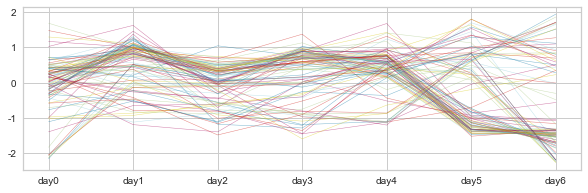

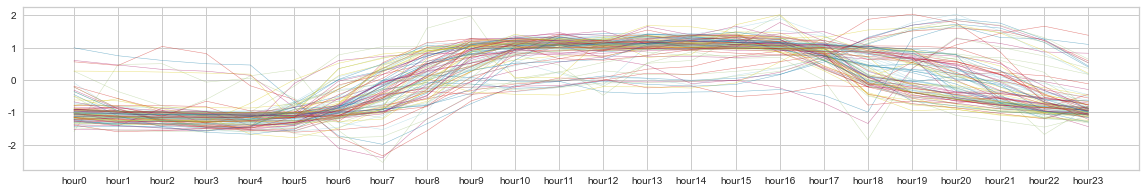

In [64]:
fig = plt.figure(figsize = (10,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 1:8], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 8:], alpha = 0.5, linewidth = 0.5)

건물별로 요일, 시간에 따른 전력사용량의 경향성이 보인다.

k-means clustering 알고리즘으로 건물들 군집화 예정

# K-means Clustering

C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

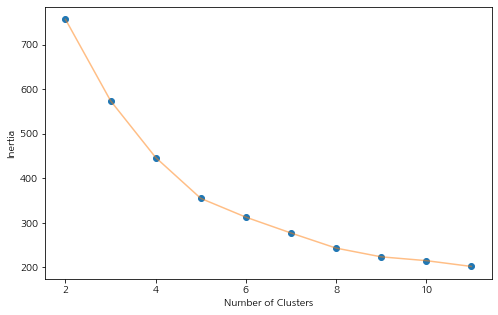

In [7]:
# elbow method를 통해 군집의 개수 결정
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (8, 5))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11],df.iloc[:,1:])

k 결정을 도와주는 KElbowVisualizer 사용

In [73]:
# pip install yellowbrick --user
# pip install scipy --user

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

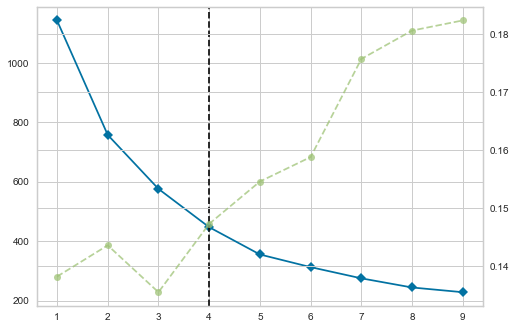

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df.iloc[:,1:])

최적의 군집 수 k = 4로 결정

In [23]:
kmeans = KMeans(n_clusters=4, random_state = 2)
km_cluster = kmeans.fit_predict(df.iloc[:,1:])

C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\magne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
df_clust

building_number      day0      day1      day2      day3      day4  \
0                 1 -0.365033  0.842013  0.048097  0.220112  0.928756   
1                 2 -1.832654  1.112889 -0.037266  0.936019 -0.197339   
2                 3 -2.059300  0.519474 -0.299443  0.690307  0.934355   
3                 4  1.027605  1.625945 -0.254553  0.093931 -0.517560   
4                 5 -1.021251 -0.928384 -0.593254 -0.343926  0.893631   
..              ...       ...       ...       ...       ...       ...   
95               96 -0.428483 -1.120118 -0.852808 -0.261510  0.028011   
96               97 -1.108302 -0.520686 -1.103538 -0.023595  0.371854   
97               98 -0.705989 -0.469207 -0.647404  0.459617  1.410409   
98               99  0.252212 -0.784497 -0.809131 -1.359305  0.416443   
99              100 -0.044498 -1.190415 -1.396166  0.015513  0.675630   

        day5      day6     hour0     hour1  ...    hour15    hour16    hour17  \
0   0.355372 -2.029317 -0.903789 -0.954297  ...  1.315072  1.246712  0.762969   
1   0.502240 -0.483890 -0.930175 -0.949983  ...  1.225588  1.296236  1.001098   
2   0.223904 -0.009297 -0.865560 -0.955021  ...  0.729634  0.890288  1.051571   
3  -0.925220 -1.050148 -1.006087 -1.036407  ...  1.164029  1.077586  0.678914   
4   1.644644  0.348541 -0.777633 -0.799466  ...  1.451557  0.863147  0.286745   
..       ...       ...       ...       ...  ...       ...       ...       ...   
95  1.700802  0.934106 -1.238255 -1.278298  ...  1.137517  0.997275  1.026690   
96  1.580437  0.803831 -1.225923 -1.388949  ...  1.163898  1.141917  1.111998   
97  1.129687 -1.177114 -1.474814 -1.545078  ...  0.990053  1.086774  1.164411   
98  1.007675  1.276603 -1.159134 -1.310561  ...  1.071249  1.188971  1.220722   
99  1.352893  0.587043 -1.260301 -1.413187  ...  1.030648  1.071989  1.086030   

      hour18    hour19    hour20    hour21    hour22    hour23  km_cluster  
0   0.115947 -0.029916 -0.237608 -0.707418 -1.185501 -0.815400           1  
1   1.114004  0.536272  0.150678 -0.425733 -1.679575 -0.839719           3  
2   1.873108  2.033132  1.763486  0.865717 -0.531652 -0.762237           3  
3   0.100259 -0.458397 -0.636445 -0.775141 -0.839006 -0.993830           1  
4  -0.391182 -0.767808 -0.866058 -0.952300 -1.027625 -1.051642           3  
..       ...       ...       ...       ...       ...       ...         ...  
95  0.851908  0.660237  0.285625  0.152404 -0.580311 -0.920005           3  
96  0.982555  0.882419  0.781673  0.291375 -0.324092 -0.871785           3  
97  0.839550  0.579748  0.359415 -0.030072 -0.691071 -1.153857           3  
98  0.956457  0.647251  0.571537  0.168056 -0.464032 -0.873863           3  
99  0.910523  0.637512  0.366842 -0.008353 -0.325825 -0.786043           3  

[100 rows x 33 columns]

In [26]:
df_clust = df.copy()
df_clust['km_cluster'] = km_cluster
df_clust['km_cluster'] = df_clust['km_cluster'].map({0:1, 1:3, 2:2, 3:0})

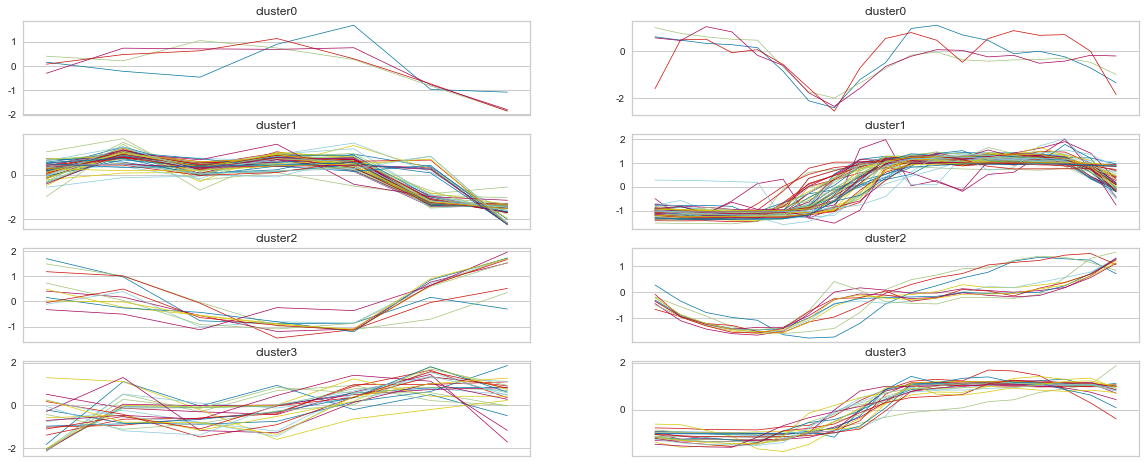

In [27]:
# visualizing result of kmeans clustering
n_c = len(np.unique(df_clust.km_cluster)) 

fig = plt.figure(figsize = (20,8))
for c in range(n_c):
    temp = df_clust[df_clust.km_cluster == c]
    plt.subplot(n_c,2,2*c+1)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,1:8], linewidth=0.7, )
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])
    plt.subplot(n_c,2,2*c+2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,8:-6], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])

좌측:요일별, 우측:0~18시 시간대별

In [28]:
train = train.merge(df_clust[['building_number','km_cluster']], on = 'building_number', how = 'left')

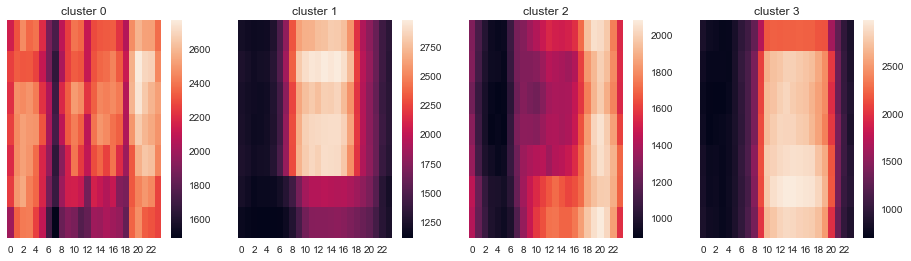

In [30]:
fig = plt.figure(figsize = (20, 4))
for c in range(4):
    temp = train[train.km_cluster == c]
    temp = temp.groupby(['weekday', 'hour'])['power_consumption'].median().reset_index().pivot('weekday', 'hour', 'power_consumption')
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f'cluster {c}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

- cluster 0 : 출근 전 시간대에 전력소모가 매우 낮고, 밤이 될 수록 전력소모 커짐 
-> no-work(7)

- cluster 1 : 월화제외 주간에 전력소모가 크고, 야간에는 전력소모가 낮음
-> weekday, work-time(8~18)

- cluster 2 : 낮보다 밤에 전력소모가 큼
-> no-work(0~8)

- cluster 3 : 야간과 주간 전력소모 차이는 뚜렷하지만, 평일 주말 관계없이 전력소모가 일정하거나 월화수 소요가 조금 더 높음
-> work-time(9~20)

In [35]:
print(train[train['km_cluster']==0].building_type.value_counts())
print('---------------------------------')
print(train[train['km_cluster']==1].building_type.value_counts())
print('---------------------------------')
print(train[train['km_cluster']==2].building_type.value_counts())
print('---------------------------------')
print(train[train['km_cluster']==3].building_type.value_counts())

Other Buildings    8160
Name: building_type, dtype: int64
---------------------------------
Public                       16320
University                   16320
Hospital                     16320
Research Institute           16320
Other Buildings              14280
Commercial                   14280
Knowledge Industry Center    14280
Discount Mart                14280
Data Center                   2040
Name: building_type, dtype: int64
---------------------------------
Apartment      16320
Data Center     6120
Name: building_type, dtype: int64
---------------------------------
Department Store and Outlet    16320
Hotel and Resort               16320
Other Buildings                 8160
Data Center                     2040
Commercial                      2040
Knowledge Industry Center       2040
Discount Mart                   2040
Name: building_type, dtype: int64


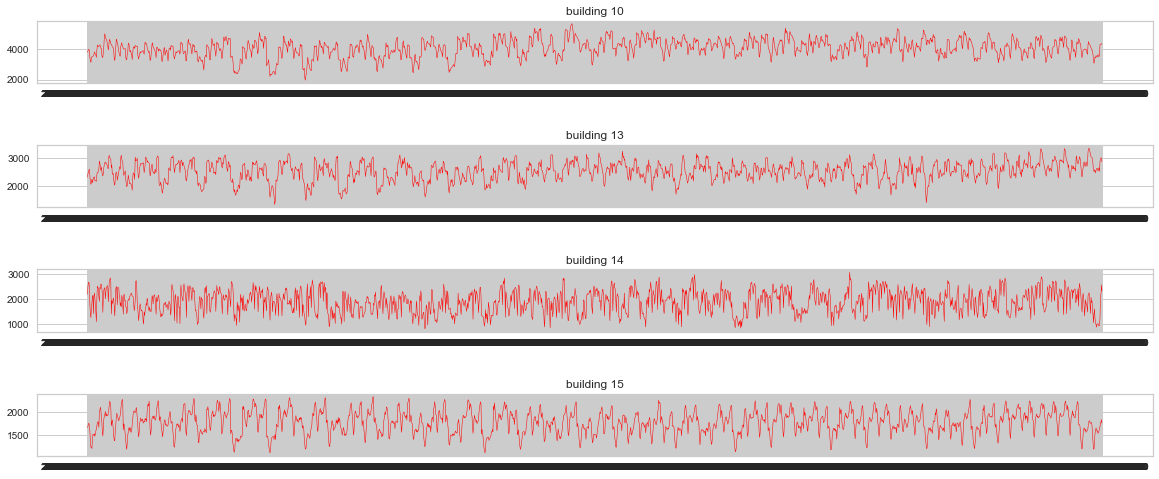

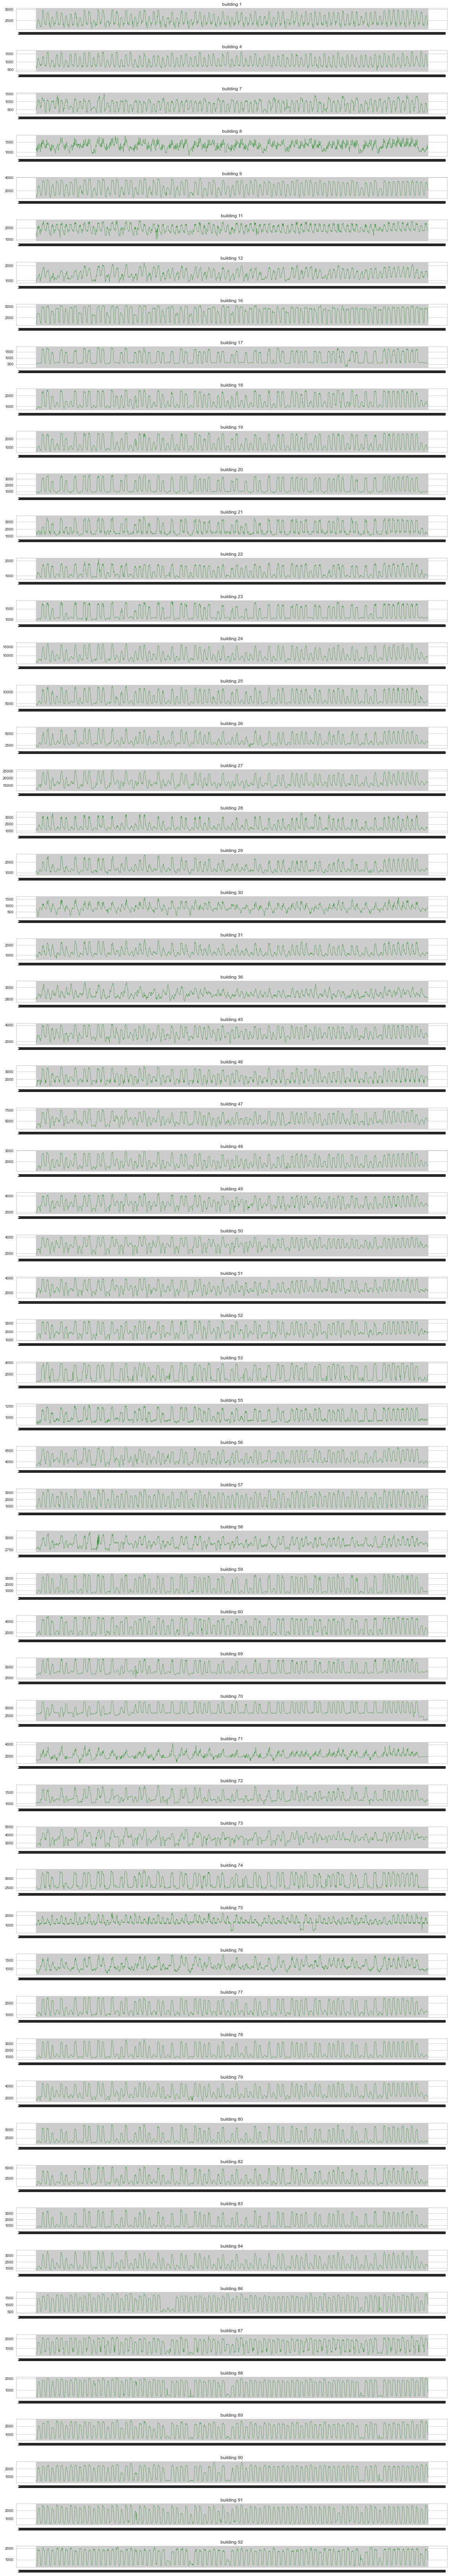

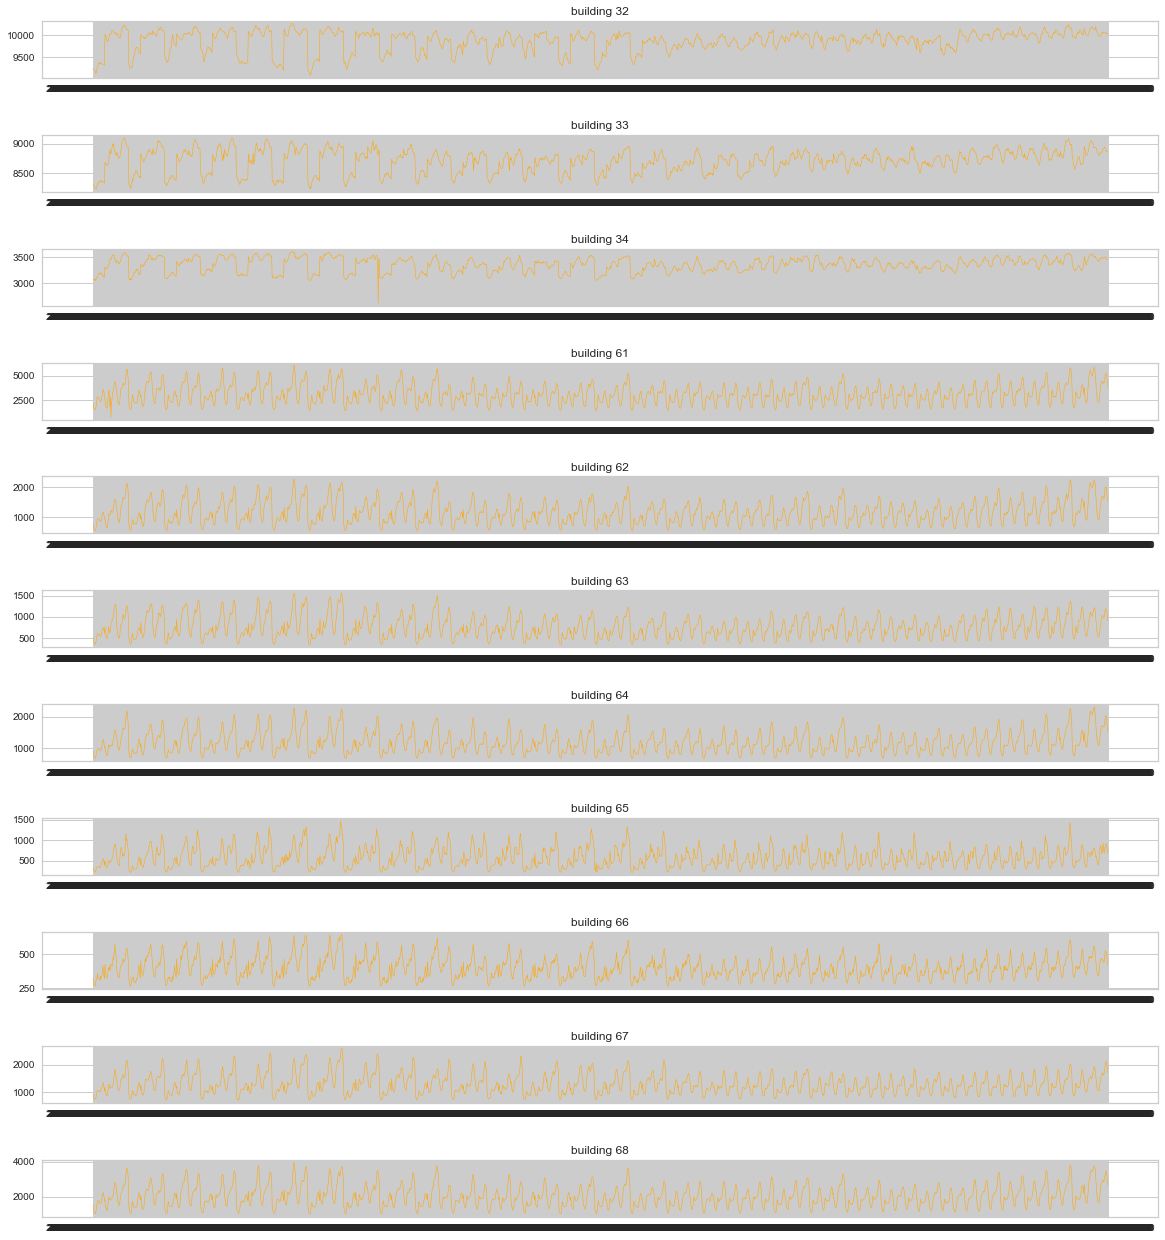

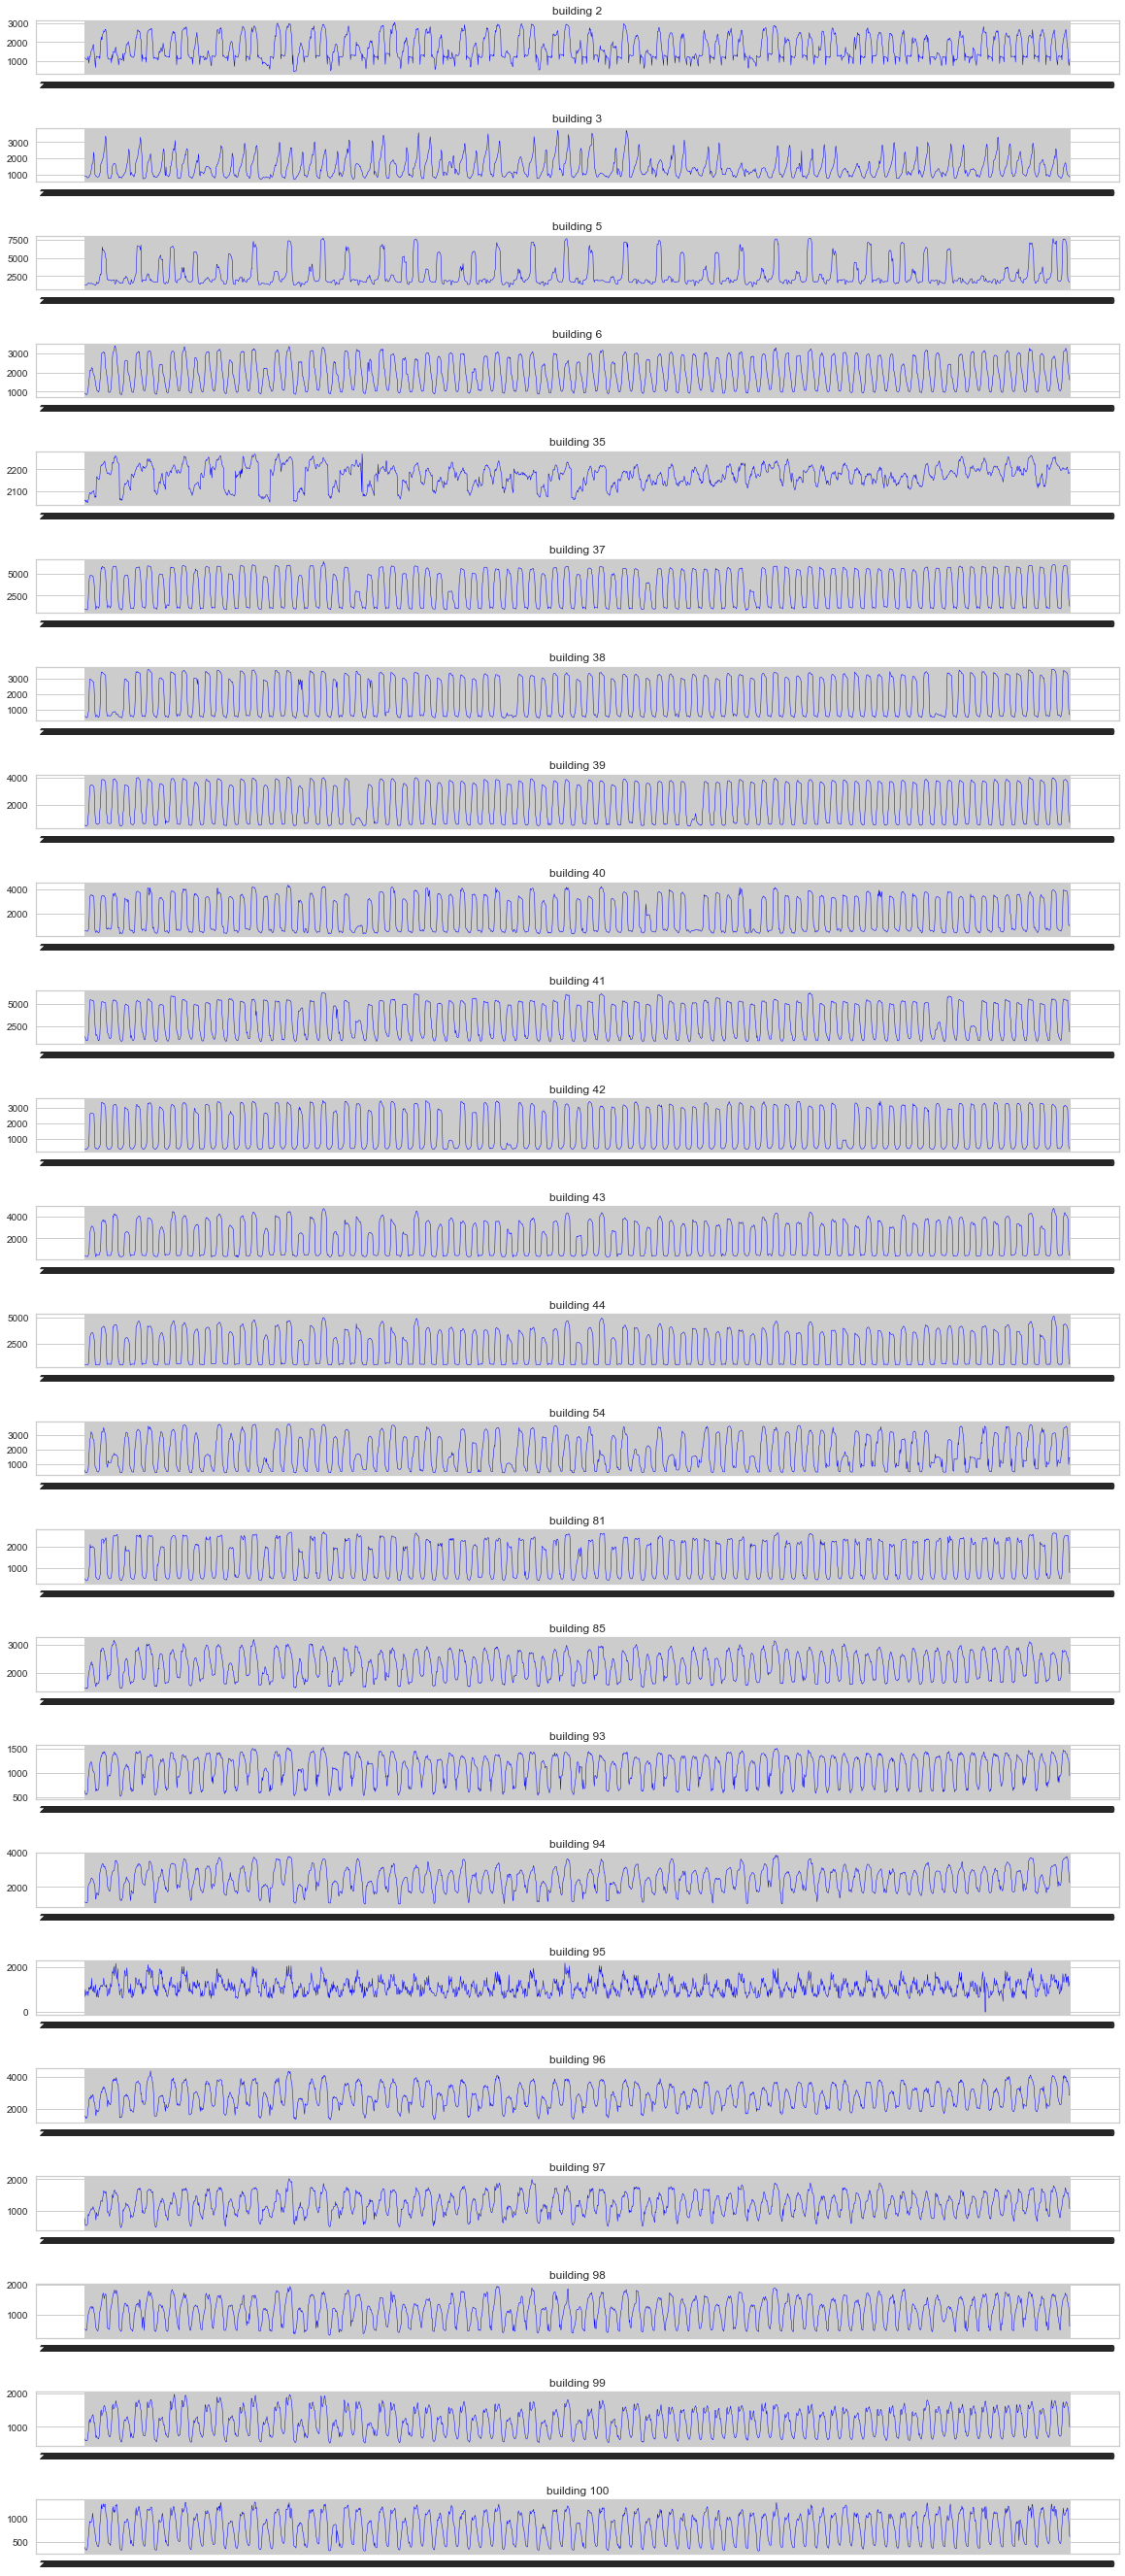

In [37]:
# linplot(energy usage of each building ~ cluster, datetime)
for c, col in enumerate(['red','green','orange','blue']):
    temp_1 = train[train.km_cluster == c]
    nums = np.unique(temp_1.building_number)
    n_nums = len(nums)
    fig = plt.figure(figsize = (20, 2*n_nums))
    for i, num in enumerate(nums):
        temp_2 = temp_1[temp_1.building_number == num]
        plt.subplot(n_nums,1, i+1)
        sns.lineplot(data = temp_2, x= 'date_time', y = 'power_consumption', linewidth = 0.5, color = col)
        plt.title(f'building {num}')
        plt.subplots_adjust(hspace = 1)
        plt.ylabel('')
        plt.xlabel('')

0. cluster 0
- 공통적인 특징이 안보임

1. cluster 1 
- 11 번 이상치 1100이하
- 86번 6월말쯤 전력사용량 꽤 오래 저하
- 1, 4, 7, 9, 11, 12, 16, 57, 75,86,87,88,89,90,91,92 제외 8월 마지막쯤 저하(45개)

2. cluster 2
- 전체적으로 7월중순 이후 변동 변화 (8월 마지막쯤 증가)
- 34번 이상치 2700이하

3. cluster 3
- 5번 8월 마지막 전주 사용량 꽤 오래 저하
- 95번 이상치 300이하

In [ ]:
# feature selection 기준 하위 10개 feature 제거 (feature_selection 노트북파일 참고)

train = train.drop(['temperature_1','temperature_2','humidity_1','humidity_2',
                'humidity_3','windspeed_1','windspeed_2','windspeed_3','discomfort_1',
                'discomfort_2','ess_no'], axis=1)
test = test.drop(['temperature_1','temperature_2','humidity_1','humidity_2',
                'humidity_3','windspeed_1','windspeed_2','windspeed_3','discomfort_1',
                'discomfort_2'], axis=1)

11, 34, 95 이상치 처리

In [70]:
num_11 = train[train['building_number']==11]
num_11[num_11['power_consumption']<1100]

building_number            date_time  temperature  windspeed  humidity  \
20525               11  2022-08-02 05:00:00         25.4        0.8     100.0   
21026               11  2022-08-09 02:00:00         25.5        1.7     100.0   
21033               11  2022-08-09 09:00:00         25.2        1.3     100.0   

       power_consumption    building_type  total_area  cooling_area  \
20525            1091.76  Other Buildings    45956.56      13190.98   
21026             951.36  Other Buildings    45956.56      13190.98   
21033            1028.16  Other Buildings    45956.56      13190.98   

       solar_power_capacity  ...  temperature_3  discomfort_3  holiday  \
20525                 447.2  ...            0.0       0.00000    False   
21026                 447.2  ...           -1.1      -1.61898    False   
21033                 447.2  ...           -0.2      -0.36000    False   

       ma_dis_3   ma_dis_5   CDH  temperature_mean  discomfort_mean  \
20525  77.78000  77.770110  15.0         25.102778        74.616058   
21026  78.14000  78.619796  -6.2         24.550000        74.619102   
21033  77.49121  77.402726  -5.0         24.550000        74.619102   

        CDH_mean  km_cluster  
20525 -10.266667           1  
21026 -18.515278           1  
21033 -18.515278           1  

[3 rows x 28 columns]

In [67]:
train.loc[20524,['hour','humidity','power_consumption']], train.iloc[20526,2:6], train.loc[21025,['hour','humidity','power_consumption']], train.iloc[21027,2:6], train.loc[21032,['hour','humidity','power_consumption']], train.iloc[21034,2:6]

(hour                       4
 humidity               100.0
 power_consumption    1683.12
 Name: 20524, dtype: object,
 temperature             25.7
 windspeed                1.2
 humidity               100.0
 power_consumption    1593.12
 Name: 20526, dtype: object,
 hour                       1
 humidity               100.0
 power_consumption    1494.72
 Name: 21025, dtype: object,
 temperature             25.6
 windspeed                2.1
 humidity               100.0
 power_consumption    1925.52
 Name: 21027, dtype: object,
 hour                       8
 humidity                98.0
 power_consumption    1979.04
 Name: 21032, dtype: object,
 temperature             25.1
 windspeed                1.3
 humidity               100.0
 power_consumption    2350.32
 Name: 21034, dtype: object)

In [71]:
# 11번 이상치(3개) 특이사항 안보여 주변 평균값으로 대체
train.loc[20525,'power_consumption'] = (1683.12+1593.12)/2
train.loc[21026,'power_consumption'] = (1494.72+1925.52)/2
train.loc[21033,'power_consumption'] = (1979.04+2350.32)/2

In [84]:
num_34 = train[train['building_number']==34]
num_34[num_34['power_consumption']<3000]

building_number            date_time  temperature  windspeed  humidity  \
67893               34  2022-08-08 21:00:00         25.9        2.1      96.0   

       power_consumption building_type  total_area  cooling_area  \
67893            2631.24   Data Center     10665.0        9402.0   

       solar_power_capacity  ...  temperature_3  discomfort_3  holiday  \
67893                   0.0  ...            0.4       0.70416    False   

        ma_dis_3   ma_dis_5  CDH  temperature_mean  discomfort_mean  \
67893  78.205153  78.189636  2.5         24.693056        74.503397   

        CDH_mean  km_cluster  
67893 -10.234722           2  

[1 rows x 28 columns]

In [83]:
train.loc[67892,'power_consumption'], train.loc[67894,'power_consumption'], train.loc[67893,'power_consumption']

(3490.92, 3452.76, 2631.24)

In [95]:
# 34 이상치(1개) 특이사항 안보여 주변 평균값으로 대체
train.loc[67893,'power_consumption'] = (3490.92+3452.76)/2

In [96]:
num_95 = train[train['building_number']==95]
num_95[num_95['power_consumption']<300]

building_number            date_time  temperature  windspeed  \
193624               95  2022-07-27 16:00:00         29.8        2.1   
193625               95  2022-07-27 17:00:00         29.5        2.4   

        humidity  power_consumption     building_type  total_area  \
193624      51.0               0.00  Hotel and Resort   196992.54   
193625      51.0               0.36  Hotel and Resort   196992.54   

        cooling_area  solar_power_capacity  ...  temperature_3  discomfort_3  \
193624      57022.55                   0.0  ...            0.6      -0.37970   
193625      57022.55                   0.0  ...            1.3       1.02847   

        holiday   ma_dis_3  ma_dis_5   CDH  temperature_mean  discomfort_mean  \
193624    False  77.644627  77.70732   3.2          25.46875        75.405822   
193625    False  77.987450  77.86023  10.2          25.46875        75.405822   

        CDH_mean  km_cluster  
193624  -3.64375           3  
193625  -3.64375           3  

[2 rows x 28 columns]

In [100]:
train.loc[193620:193629,'power_consumption']

193620    1459.08
193621    1421.64
193622     866.88
193623    1567.08
193624       0.00
193625       0.36
193626    1002.60
193627    1309.32
193628    1196.64
193629    1134.36
Name: power_consumption, dtype: float64

In [101]:
# 95 호텔 정전으로 인한 이상치(2개)로 보임 -> 주변 평균값 대체

train.loc[193624,'power_consumption'] = (1459.08+1421.64+866.88+1567.08)/4
train.loc[193625,'power_consumption'] = (1002.60+1309.32+1196.64+1134.36)/4

# 08.11 작업 완료

In [111]:
# 86번 6월 말쯤 데이터 훑기 (진행중)

num_86 =train[train['building_number']==86]
print(num_86[(num_86.month==6)&(num_86.day<30)&(num_86.day>20)].power_consumption.mean())
print(num_86[(num_86.month==6)&(num_86.day<20)].power_consumption.mean())

1109.3304166666671
1055.3167105263153


In [ ]:
# cluster 1 45개 건물 공통점 찾기(8월 말쯤 저하를 보임)

pass

In [ ]:
# cluster 2 전체적으로 7월 중순 이후 변동 변화

pass

In [ ]:
# cluster 3 5번 8월 말쯤 데이터 훑기

pass

In [39]:
match = df_clust[['building_number','km_cluster']]
clust_to_num = {0:[],1:[],2:[],3:[]}
for i in range(100):
    c = match.iloc[i,1]
    clust_to_num[c].append(i+1)

In [ ]:
# cluster 0
df_0 = train[train.km_cluster == 0]
df = df_0.groupby(['building_number','date'])['temperature','humidity','windspeed','insolation','precipitation','target'].mean().reset_index()
corrs_0 = []
for num in clust_to_num[0]:
    corr = []
    corr.append(num)
    for feat in ['temperature','humidity','windspeed','insolation','precipitation']:
        corr.append(spearmanr(df.loc[df.num == num, feat], df.loc[df.num == num, 'target']).correlation)
    corrs_0.append(corr)
# cluster 1
df_1 = eda_df[eda_df.km_cluster == 1]
df = df_1.groupby(['num','date'])['temperature','humidity','windspeed','insolation','precipitation','target'].mean().reset_index()
corrs_1 = []
for num in clust_to_num[1]:
    corr = []
    corr.append(num)
    for feat in ['temperature','humidity','windspeed','insolation','precipitation']:
        corr.append(spearmanr(df.loc[df.num == num, feat], df.loc[df.num == num, 'target']).correlation)
    corrs_1.append(corr)
# cluster 2
df_2 = eda_df[eda_df.km_cluster == 2]
df = df_2.groupby(['num','date'])['temperature','humidity','windspeed','insolation','precipitation','target'].mean().reset_index()
corrs_2 = []
for num in clust_to_num[2]:
    corr = []
    corr.append(num)
    for feat in ['temperature','humidity','windspeed','insolation','precipitation']:
        corr.append(spearmanr(df.loc[df.num == num, feat], df.loc[df.num == num, 'target']).correlation)
    corrs_2.append(corr)
# cluster 3
df_3 = eda_df[eda_df.km_cluster == 3]
df = df_3.groupby(['num','date'])['temperature','humidity','windspeed','insolation','precipitation','target'].mean().reset_index()
corrs_3 = []
for num in clust_to_num[3]:
    corr = []
    corr.append(num)
    for feat in ['temperature','humidity','windspeed','insolation','precipitation']:
        corr.append(spearmanr(df.loc[df.num == num, feat], df.loc[df.num == num, 'target']).correlation)
    corrs_3.append(corr)
corrs_total = [corrs_0, corrs_1, corrs_2, corrs_3]